In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.sparse import csc_matrix
from sklearn.metrics.pairwise import cosine_similarity
import sklearn
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('MusicalDataset.csv')                          #importing the dataset(.csv)

In [3]:
df.head(5)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1384719342,"[0, 0]",5,"Not much to write about here, but it does exac...","02 28, 2014",A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...",good,1393545600
1,1384719342,"[13, 14]",5,The product does exactly as it should and is q...,"03 16, 2013",A14VAT5EAX3D9S,Jake,Jake,1363392000
2,1384719342,"[1, 1]",5,The primary job of this device is to block the...,"08 28, 2013",A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",It Does The Job Well,1377648000
3,1384719342,"[0, 0]",5,Nice windscreen protects my MXL mic and preven...,"02 14, 2014",A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",GOOD WINDSCREEN FOR THE MONEY,1392336000
4,1384719342,"[0, 0]",5,This pop filter is great. It looks and perform...,"02 21, 2014",A94QU4C90B1AX,SEAN MASLANKA,No more pops when I record my vocals.,1392940800


In [4]:
drop_col=['reviewText','reviewerName','reviewTime','summary']            #droping unnecessery column for us
df.drop(drop_col, inplace=True, axis=1)

In [5]:
df.head()

,asin,helpful,overall,reviewerID,unixReviewTime
0,1384719342,"[0, 0]",5,A2IBPI20UZIR0U,1393545600
1,1384719342,"[13, 14]",5,A14VAT5EAX3D9S,1363392000
2,1384719342,"[1, 1]",5,A195EZSQDW3E21,1377648000
3,1384719342,"[0, 0]",5,A2C00NNG1ZQQG2,1392336000
4,1384719342,"[0, 0]",5,A94QU4C90B1AX,1392940800


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 5 columns):
asin              10261 non-null object
helpful           10261 non-null object
overall           10261 non-null int64
reviewerID        10261 non-null object
unixReviewTime    10261 non-null int64
dtypes: int64(2), object(3)
memory usage: 400.9+ KB


In [7]:
df.dropna(how="all", inplace=True)    #droping all NA value from the dataset

In [8]:
df.head(10)

,asin,helpful,overall,reviewerID,unixReviewTime
0,1384719342,"[0, 0]",5,A2IBPI20UZIR0U,1393545600
1,1384719342,"[13, 14]",5,A14VAT5EAX3D9S,1363392000
2,1384719342,"[1, 1]",5,A195EZSQDW3E21,1377648000
3,1384719342,"[0, 0]",5,A2C00NNG1ZQQG2,1392336000
4,1384719342,"[0, 0]",5,A94QU4C90B1AX,1392940800
5,B00004Y2UT,"[0, 0]",5,A2A039TZMZHH9Y,1356048000
6,B00004Y2UT,"[0, 0]",5,A1UPZM995ZAH90,1390089600
7,B00004Y2UT,"[0, 0]",3,AJNFQI3YR6XJ5,1353024000
8,B00004Y2UT,"[0, 0]",5,A3M1PLEYNDEYO8,1215302400
9,B00004Y2UT,"[0, 0]",5,AMNTZU1YQN1TH,1389139200


In [9]:
df.isnull().values.any()

False

In [10]:
sum(df['reviewerID'].isnull())                                  #checking for any null value

0

In [11]:
sum(df['asin'].isnull())

0

In [12]:
sum(df['helpful'].isnull())

0

In [13]:
sum(df['unixReviewTime'].isnull())

0

In [14]:
sum(df['overall'].isnull())

0

In [15]:
df.head()

,asin,helpful,overall,reviewerID,unixReviewTime
0,1384719342,"[0, 0]",5,A2IBPI20UZIR0U,1393545600
1,1384719342,"[13, 14]",5,A14VAT5EAX3D9S,1363392000
2,1384719342,"[1, 1]",5,A195EZSQDW3E21,1377648000
3,1384719342,"[0, 0]",5,A2C00NNG1ZQQG2,1392336000
4,1384719342,"[0, 0]",5,A94QU4C90B1AX,1392940800


In [16]:
df.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [17]:
print(len(df['asin'].unique()))               #counting no of unique product

print(len(df['reviewerID'].unique()))       #no of unique customer
print(len(df['overall'].unique()))         #no of unique ratings

900
1429
5


In [18]:
print ("Mean rating : " + str(df['overall'].mean()))
print ("Mean rating standard deviation: " + str(df['overall'].std()))

Mean rating : 4.488743787155248
Mean rating standard deviation: 0.8946423761647286


Text(0, 0.5, 'count of reviews')

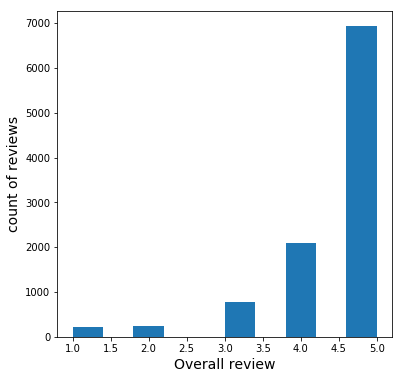

In [19]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.hist(df['overall'])
ax.set_xlabel('Overall review', fontsize=14)
ax.set_ylabel('count of reviews', fontsize=14)

In [20]:
avg_num_reviews = df.groupby('reviewerID')['asin'].count()
print ("Avg no of ratings per reviewer : " + str(avg_num_reviews.mean()))

Avg no of ratings per reviewer : 7.1805458362491255


In [21]:
productmat0 = df.pivot_table(index='reviewerID', columns='asin', values='overall')        #creating user-item matrix

In [22]:
productmat0.head(10)

asin,1384719342,B00004Y2UT,B00005ML71,B000068NSX,B000068NTU,B000068NVI,B000068NW5,B000068NZC,B000068NZG,B000068O1N,...,B00EPWAQS0,B00EQDITGO,B00F2PKRJW,B00FXKIG5I,B00GTSM8FW,B00H02C9TG,B00HFRXACG,B00IZCSW3M,B00J4TBMVO,B00JBIVXGC
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00625243BI8W1SSZNLMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10044ECXDUVKS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A102MU6ZC9H1N6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A109JTUZXO61UY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A109ME7C09HM2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10APIDAZISWQF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10B2J2IRQXBWA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10E3QH2FQUBLF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10FM4ILBIMJJ7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
productmat0.tail(10)

asin,1384719342,B00004Y2UT,B00005ML71,B000068NSX,B000068NTU,B000068NVI,B000068NW5,B000068NZC,B000068NZG,B000068O1N,...,B00EPWAQS0,B00EQDITGO,B00F2PKRJW,B00FXKIG5I,B00GTSM8FW,B00H02C9TG,B00HFRXACG,B00IZCSW3M,B00J4TBMVO,B00JBIVXGC
reviewerID,,,,,,,,,,,,,,,,,,,,,
AZ9KESC05F6RI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZAYBFPLEDFL7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZBUUKQLYKUCL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZCP5P3BARLS5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZE83O4F1IJPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZJPNK73JF3XP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
AZMHABTPXVLG3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZMIKIG4BB6BZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZPDO6FLSMLFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
productmat0.shape

(1429, 900)

In [25]:
useritem_mat = df.pivot_table(index='reviewerID', columns='asin', values='overall')     #user-item matrix with all na value as 0
productmat0 =useritem_mat.fillna(0)

In [26]:
productmat0.head(10)

asin,1384719342,B00004Y2UT,B00005ML71,B000068NSX,B000068NTU,B000068NVI,B000068NW5,B000068NZC,B000068NZG,B000068O1N,...,B00EPWAQS0,B00EQDITGO,B00F2PKRJW,B00FXKIG5I,B00GTSM8FW,B00H02C9TG,B00HFRXACG,B00IZCSW3M,B00J4TBMVO,B00JBIVXGC
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00625243BI8W1SSZNLMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10044ECXDUVKS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A102MU6ZC9H1N6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A109JTUZXO61UY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A109ME7C09HM2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10APIDAZISWQF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10B2J2IRQXBWA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10E3QH2FQUBLF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10FM4ILBIMJJ7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
productmat = np.asarray(productmat0)                          #converting to np array

In [28]:
print(productmat)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
# This creats a validation dataset 

def train_test_split(productmat):
    
    validation = np.zeros(productmat.shape)
    train = productmat.copy() 
    
    for user in np.arange(productmat.shape[0]):
        if len(productmat[user,:].nonzero()[0])>=8:     # 8 seems to be best, asit depends on sparsity of user-item matrix
            val_ratings = np.random.choice(productmat[user, :].nonzero()[0], 
                                        size=5,         #totally selected upon optimality bwtween results
                                        replace=False)
            train[user, val_ratings] = 0
            validation[user, val_ratings] = productmat[user, val_ratings]
    print(validation.shape)
    return train, validation

In [30]:
(train, val) = train_test_split(productmat)            #spliting of dataset into train & test

(1429, 900)


# Similarity Calculation

In [31]:
item_simpearson=productmat0.corr(method='pearson')        #item-item similarity based on pearson method
print(item_simpearson.shape)
item_simpearson.head()

(900, 900)


asin,1384719342,B00004Y2UT,B00005ML71,B000068NSX,B000068NTU,B000068NVI,B000068NW5,B000068NZC,B000068NZG,B000068O1N,...,B00EPWAQS0,B00EQDITGO,B00F2PKRJW,B00FXKIG5I,B00GTSM8FW,B00H02C9TG,B00HFRXACG,B00IZCSW3M,B00J4TBMVO,B00JBIVXGC
asin,,,,,,,,,,,,,,,,,,,,,
1384719342,1.000000,-0.003799,-0.003356,-0.004133,-0.003499,-0.005643,-0.011232,-0.004012,-0.003491,-0.004708,...,-0.003459,-0.003273,-0.003280,-0.004016,-0.006305,-0.003836,-0.005202,-0.007702,-0.004340,-0.005623
B00004Y2UT,-0.003799,1.000000,-0.003632,-0.004472,-0.003786,-0.006107,-0.012154,-0.004341,0.205797,-0.005094,...,-0.003743,-0.003542,-0.003550,-0.004345,0.114084,-0.004151,-0.005629,0.084133,0.161728,0.125482
B00005ML71,-0.003356,-0.003632,1.000000,-0.003951,-0.003345,-0.005394,-0.010736,-0.003834,-0.003337,-0.004500,...,-0.003306,-0.003129,-0.003136,-0.003839,0.056931,-0.003667,-0.004973,0.040787,-0.004148,-0.005374
B000068NSX,-0.004133,-0.004472,-0.003951,1.000000,-0.004119,-0.006643,-0.013221,-0.004722,-0.004110,-0.005542,...,-0.004072,0.211242,-0.003862,-0.004727,-0.007422,-0.004516,-0.006124,-0.009067,-0.005108,-0.006618
B000068NTU,-0.003499,-0.003786,-0.003345,-0.004119,1.000000,-0.005624,0.046259,0.201197,-0.003479,-0.004691,...,-0.003447,-0.003262,0.228455,-0.004002,-0.006284,-0.003823,-0.005184,-0.007676,-0.004325,-0.005603


In [32]:
item_simcosine = cosine_similarity(train.T)        #item-item similarity based on cosine method
print (item_simcosine.shape)
print (item_simcosine)

(900, 900)
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.11387188 0.20145574 0.15594572]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.11387188 0.         ... 1.         0.48082542 0.39777543]
 [0.         0.20145574 0.         ... 0.48082542 1.         0.50265855]
 [0.         0.15594572 0.         ... 0.39777543 0.50265855 1.        ]]


In [33]:
user_simpearson=(productmat0.T).corr(method='pearson')               #user-user similarity based on pearson method
print(user_simpearson.shape)
user_simpearson.head()

(1429, 1429)


reviewerID,A00625243BI8W1SSZNLMD,A10044ECXDUVKS,A102MU6ZC9H1N6,A109JTUZXO61UY,A109ME7C09HM2M,A10APIDAZISWQF,A10B2J2IRQXBWA,A10E3QH2FQUBLF,A10FM4ILBIMJJ7,A10H2F00ZOT8S2,...,AZ9KESC05F6RI,AZAYBFPLEDFL7,AZBUUKQLYKUCL,AZCP5P3BARLS5,AZE83O4F1IJPR,AZJPNK73JF3XP,AZMHABTPXVLG3,AZMIKIG4BB6BZ,AZPDO6FLSMLFP,AZVME8JMPD3F4
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00625243BI8W1SSZNLMD,1.000000,-0.007092,-0.007701,0.318878,-0.007062,-0.007631,-0.007022,-0.007693,-0.008893,-0.007693,...,-0.007628,-0.007038,-0.010348,-0.006521,-0.010938,-0.010444,-0.006793,-0.007038,-0.008343,-0.008080
A10044ECXDUVKS,-0.007092,1.000000,0.217330,-0.005610,-0.005610,-0.006062,0.192857,-0.006111,-0.007064,-0.006111,...,0.184617,-0.005590,-0.008220,-0.005180,-0.008689,-0.008297,-0.005396,0.232640,0.152867,-0.006418
A102MU6ZC9H1N6,-0.007701,0.217330,1.000000,-0.006092,-0.006092,-0.006582,-0.006058,-0.006636,0.129314,-0.006636,...,-0.006580,-0.006071,0.110622,0.050878,-0.009435,-0.009010,-0.005860,0.359807,-0.007197,-0.006970
A109JTUZXO61UY,0.318878,-0.005610,-0.006092,1.000000,-0.005587,-0.006036,-0.005555,-0.006086,-0.007035,-0.006086,...,-0.006034,-0.005567,-0.008186,-0.005159,-0.008652,0.113140,-0.005374,-0.005567,-0.006600,-0.006391
A109ME7C09HM2M,-0.007062,-0.005610,-0.006092,-0.005587,1.000000,-0.006036,-0.005555,-0.006086,-0.007035,0.156195,...,-0.006034,-0.005567,-0.008186,-0.005159,-0.008652,-0.008262,-0.005374,-0.005567,-0.006600,-0.006391


In [34]:
user_simcosine = cosine_similarity(train)              #user-user similarity based on cosine method
print (user_simcosine.shape)
print (user_simcosine)

(1429, 1429)
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.22208408 ... 0.23690564 0.15843106 0.        ]
 [0.         0.22208408 1.         ... 0.36366085 0.         0.        ]
 ...
 [0.         0.23690564 0.36366085 ... 1.         0.         0.        ]
 [0.         0.15843106 0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


## Memory based CF

In [35]:
 # prediction using cosine similarity matrix as weights (memory based CF)
# and adjusting bias for individual user by mean-subtraction of rating



def predict(productmat, similarity, kind='user'):
    if kind == 'user':
        user_bias = productmat.mean(axis=1)
        productmat = (productmat - user_bias[:, np.newaxis]).copy()
        predt = similarity.dot(productmat) / np.array([np.abs(similarity).sum(axis=1)]).T
        predt += user_bias[:, np.newaxis]
    elif kind == 'item':
        item_bias = productmat.mean(axis=0)
        productmat = (productmat - item_bias[np.newaxis, :]).copy()
        predt = productmat.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        predt += item_bias[np.newaxis, :]
        
    return predt

In [36]:
user_prediction = predict(train, user_simcosine, kind='user')
item_prediction = predict(train, item_simcosine, kind='item')

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [38]:
print ('User-based bias-adjusted CF RMSE: %.3f' %rmse(user_prediction, val))
print ('Item-based bias-adjusted CF RMSE: %.3f' %rmse(item_prediction, val))

User-based bias-adjusted CF RMSE: 4.469
Item-based bias-adjusted CF RMSE: 4.475


## Model based collaborative filtering(matrix factorization)

In [39]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [40]:
#SVD components from train matrix. Choose k.
u, s, vt = svds(train, k = 20)# k, dimensionality for rank matrix
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

In [41]:
print ('matrix-factorization CF RMSE: %.3f' %rmse(X_pred, val))

matrix-factorization CF RMSE: 4.490


### KNN BASED ALGORITHM

In [42]:
from scipy.sparse import csr_matrix

In [43]:
productmat1=csr_matrix(productmat0.values)

In [44]:
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(productmat1.T)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [45]:
query_index = np.random.choice(productmat0.T.shape[0])
distances, indices = model_knn.kneighbors(productmat0.T.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 10)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print ('Recommendations for {0}:\n'.format(productmat0.T.index[query_index]))
    else:
        print ('{0}: {1}, with distance of {2}:'.format(i, productmat0.T.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for B0002E1O90:

1: B009AS1FLG, with distance of 0.7668737979399216:
2: B004ISLGKS, with distance of 0.7763932022500211:
3: B000BBRZ3S, with distance of 0.7807354951732427:
4: B004PFWZHM, with distance of 0.7838311494164416:
5: B0002M72JS, with distance of 0.8:
6: B000EEJAFS, with distance of 0.8053752639596192:
7: B000RMQM4E, with distance of 0.8116891057113227:
8: B0002CZT0M, with distance of 0.8215423474379376:
9: B00J4TBMVO, with distance of 0.8285014148574912:


In [46]:
useritem_mat = df.pivot_table(index='reviewerID', columns='asin', values='overall').fillna(0)     

In [47]:
useritem_mat.head()

asin,1384719342,B00004Y2UT,B00005ML71,B000068NSX,B000068NTU,B000068NVI,B000068NW5,B000068NZC,B000068NZG,B000068O1N,...,B00EPWAQS0,B00EQDITGO,B00F2PKRJW,B00FXKIG5I,B00GTSM8FW,B00H02C9TG,B00HFRXACG,B00IZCSW3M,B00J4TBMVO,B00JBIVXGC
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00625243BI8W1SSZNLMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10044ECXDUVKS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A102MU6ZC9H1N6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A109JTUZXO61UY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A109ME7C09HM2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
useritem_mat.shape

(1429, 900)

In [49]:
X = useritem_mat.values.T
X.shape

(900, 1429)

### Matrix Factorization(SVD)

In [50]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=10, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(900, 10)

In [51]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(900, 900)

In [52]:
product_no = useritem_mat.columns
product_no_list = list(product_no)
sample_product = product_no_list.index("B0002CZT0M")
print(sample_product)

28


In [53]:
sample_one  = corr[sample_product]

In [54]:
list(product_no[(sample_one<0.9) & (sample_one>0.8)])[:10]

['B0002CZSJO',
 'B0002D0LKY',
 'B0002DVBJY',
 'B0002E1NQE',
 'B0002E1O5E',
 'B0009G1KEU',
 'B000A6ASSS',
 'B000J3L02U',
 'B002GYWBKU',
 'B003B01QR2']

## NMF Algorithm

In [55]:
from sklearn.decomposition import NMF

In [56]:
nmf = NMF(n_components=100,solver="mu")             #‘mu’ is a Multiplicative Update solver.
                                                    #beta_loss : float or string, default ‘frobenius’

In [57]:
W = nmf.fit_transform(productmat0)
H = nmf.components_

In [58]:
print(W)

[[3.78283468e-024 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.77658222e-031 0.00000000e+000 0.00000000e+000 ... 1.89245894e-002
  0.00000000e+000 0.00000000e+000]
 [2.65816093e-001 4.66056040e-001 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [3.33841663e-001 0.00000000e+000 0.00000000e+000 ... 2.76933446e-002
  3.82787366e-002 0.00000000e+000]
 [1.20495018e-033 0.00000000e+000 4.86984338e-123 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [3.31068486e-003 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  3.01962593e-002 0.00000000e+000]]


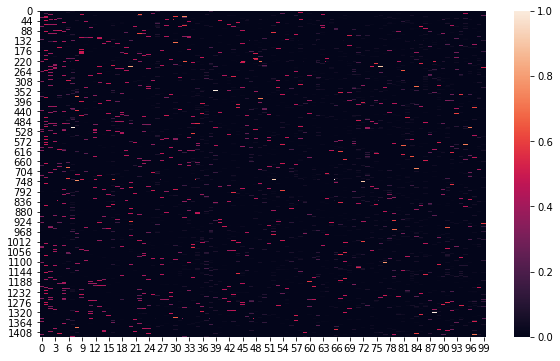

In [59]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(W,vmin=0, vmax=1, ax=ax)
#sns.heatmap(W,cmap='RdBu')

In [60]:
print(H)

[[3.19501510e-002 4.27804314e-002 1.56298751e-191 ... 6.42095153e-012
  4.06339842e-002 2.24949868e-001]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 2.73791984e-002 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.52660286e-051
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 6.12121983e-197 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 3.47814586e-171 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 2.96541438e-026]]


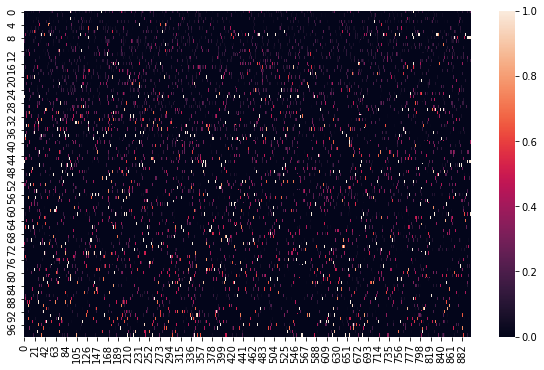

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(H,vmin=0, vmax=1,ax=ax)
#sns.heatmap(H,cmap='RdBu')

In [62]:
Vt=np.matmul(W,H)

In [63]:
print(Vt)

[[6.67118457e-02 1.88543040e-01 3.90559979e-02 ... 1.16441917e-02
  2.43819001e-03 3.83981526e-03]
 [2.72588345e-05 1.11787039e-26 1.40678261e-03 ... 1.25519445e-03
  1.05019639e-15 3.99642054e-32]
 [9.99743604e-03 1.34154706e-01 2.70205269e-02 ... 1.70679279e-12
  1.08011675e-02 5.97952951e-02]
 ...
 [1.06662915e-02 1.68742238e-02 1.94602601e-03 ... 2.18763051e-04
  1.35657686e-02 7.50976393e-02]
 [6.48089039e-02 1.30129008e-27 2.77974304e-03 ... 1.97143353e-04
  3.53220801e-03 9.47472925e-06]
 [5.24978018e-03 1.41632527e-04 6.51051996e-18 ... 4.86485930e-08
  1.34526316e-04 7.44738124e-04]]


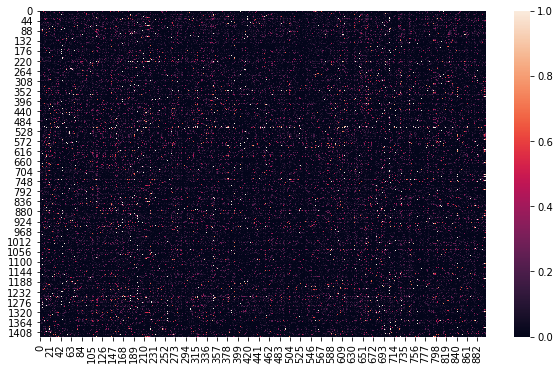

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(Vt,vmin=0, vmax=1,ax=ax)

In [65]:
print(type(Vt))

<class 'numpy.ndarray'>


In [66]:
VtFinal=pd.DataFrame(data=Vt[0:,0:],index=(productmat0.index),columns=(productmat0.columns))

In [67]:
VtFinal.head(5)

asin,1384719342,B00004Y2UT,B00005ML71,B000068NSX,B000068NTU,B000068NVI,B000068NW5,B000068NZC,B000068NZG,B000068O1N,...,B00EPWAQS0,B00EQDITGO,B00F2PKRJW,B00FXKIG5I,B00GTSM8FW,B00H02C9TG,B00HFRXACG,B00IZCSW3M,B00J4TBMVO,B00JBIVXGC
reviewerID,,,,,,,,,,,,,,,,,,,,,
A00625243BI8W1SSZNLMD,0.066712,1.885430e-01,0.039056,1.343467e-01,3.451262e-25,2.623510e-02,0.005519,2.078520e-01,6.896554e-02,3.980869e-02,...,8.446009e-33,5.438697e-04,2.370268e-28,8.129346e-18,0.004748,4.078517e-03,4.546076e-03,1.164419e-02,2.438190e-03,3.839815e-03
A10044ECXDUVKS,0.000027,1.117870e-26,0.001407,8.051072e-19,8.850421e-29,4.154911e-01,0.290656,2.212122e-40,1.409267e-01,1.971233e-01,...,4.263342e-02,3.326493e-07,5.823481e-15,1.052091e-05,0.000014,3.141661e-42,4.722811e-39,1.255194e-03,1.050196e-15,3.996421e-32
A102MU6ZC9H1N6,0.009997,1.341547e-01,0.027021,4.446078e-03,3.403903e-02,6.128379e-04,0.288355,1.394422e-02,1.200234e-01,8.828539e-03,...,4.229596e-02,2.717899e-02,9.855937e-09,3.935656e-02,0.033895,3.647163e-03,1.792689e-04,1.706793e-12,1.080117e-02,5.979530e-02
A109JTUZXO61UY,0.186465,2.098282e-02,0.000028,6.602282e-06,4.662037e-02,2.911521e-08,0.024455,2.450951e-31,2.318747e-45,2.366974e-16,...,1.414949e-41,7.824783e-10,1.673023e-56,7.196369e-02,0.095857,6.221403e-09,5.511776e-09,2.534531e-15,1.603938e-05,8.879407e-05
A109ME7C09HM2M,0.173903,3.386622e-59,0.076589,2.443626e-01,5.285598e-07,3.631691e-02,0.000031,2.065337e-40,2.806888e-49,9.375416e-02,...,1.808709e-29,4.730203e-02,7.999348e-21,3.801124e-02,0.166565,3.731042e-04,3.301176e-04,8.437644e-02,1.875299e-08,1.093315e-38


In [68]:
key=input("Enter the CUSTOMER ID:")                      #Predicting PRODUCT ID  for a single CUSTOMER ID as per keyboard input 
N=VtFinal.loc[[key]].T
N_item=N.sort_values(by=key,ascending=False)
print("The list of PRODUCT to be recommended for--->:",N_item[:10])

Enter the CUSTOMER ID:A2XXBZPQT5EXHV
The list of PRODUCT to be recommended for--->: reviewerID  A2XXBZPQT5EXHV
asin                      
B003VWJ2K8        5.013134
B000978D58        1.661157
B0002CZW0Y        1.338563
B000VBH2IG        1.202795
B000KIPT30        1.045083
B0000AQRSU        0.724855
B0002E4Z8M        0.622466
B0002T67J2        0.615379
B001QWBM62        0.562702
B000ULAP4U        0.542117


In [69]:
import random                                                   #Predicting PRODUCT ID  for randomly selected CUSTOMER ID
for i in range (5):
    key=random.choice((productmat0.index))
    N=VtFinal.loc[[key]].T
    N_item=N.sort_values(by=key,ascending=False)
    print(N_item[:10])

reviewerID  ANADY67KNW4Z
asin                    
B0002E2KPC      2.890143
B0018TAITA      2.211819
B0000AQRSU      1.406693
B0000AQRST      0.835483
B003VYBD58      0.832710
B0002ZPK5I      0.652222
B0002M3OVI      0.575587
B0010KCP98      0.539374
B000068O1N      0.539164
B000CCIVCA      0.539110
reviewerID  A1O3P80RRDUV5P
asin                      
B0002D0CGC        5.038299
B003VWJ2K8        4.957987
B0026RB0G8        4.498286
B0002D0CGW        1.107679
B0002E2KPC        0.892303
B000BUDO48        0.647228
B0002D0CGM        0.642606
B005PGGU9O        0.636403
B0002D0CIK        0.556668
B000M23OQ8        0.529628
reviewerID  AJGIN15VFGXBG
asin                     
B005CX4GLE       4.844335
B0037M62KA       3.058037
B004T6M7DE       1.723374
B0002GXF8Q       1.012615
B0002KZAKS       0.766282
B000068O3D       0.628992
B000J5UEGQ       0.622513
B000J5XS3C       0.619359
B009ZX8ZJG       0.572733
B002G1UT5C       0.556823
reviewerID  A18DTTRCYR8TD7
asin                      
B0002F7IIK

In [70]:
key=input("Enter the PRODUCT ID:")                #Predicting CUSTOMER ID  for a single PRODUCT ID ID as per keyboard input 
M=((VtFinal[[key]]))
M_user=M.sort_values(by=key,ascending=False)
print("The list of CUSTOMER ID to whom product is recommended :\n",M_user[:10])

Enter the PRODUCT ID:B000MFN8B6
The list of CUSTOMER ID to whom product is recommended :
 asin            B000MFN8B6
reviewerID                
A1365RYO0BLEMI    2.607671
A2EZWZ8MBEDOLN    1.597438
ALV33FTOC032I     1.447827
A35HTG0YUEKFGM    0.972385
A1HR4TQ0HAGU8T    0.888714
ABZYVME9NYCQG     0.878948
A2206923NH9ZDI    0.846364
A2C6Z7M3RMUG45    0.835523
ADH0O8UVJOT10     0.823212
A204ETWOV23HO4    0.816001


In [71]:
import random                                       #Predicting CUSTOMER ID  for randomly selected PRODUCT ID
for i in range (5):
    key=random.choice((productmat0.columns))
    M=((VtFinal[[key]]))
    M_user=M.sort_values(by=key,ascending=False)
    print(M_user[:10])

asin            B001U5PCFM
reviewerID                
A3237FOR4LVBZO    0.575126
AF7AQHLX1UV1Z     0.489312
A1RPTVW5VEOSI     0.453056
A1ZV3RNQH852U2    0.435032
A2O8BAXJPDSV0M    0.412382
A3GSBNVP2LPFRB    0.385529
A3NRNJN4GAQ2V6    0.378359
AB7WPLA1CN5I1     0.338951
A23NSKTMSPPBTR    0.330940
A14CQY582WMP7O    0.315274
asin            B0002PBS6S
reviewerID                
A37A41GWQFMK3D    1.045909
A2EDYSY4M8TESS    0.767190
AG1ZYSLKQCLMD     0.712162
A1BH17V8BKLES     0.689516
A1UPZM995ZAH90    0.683592
A781ITP3HE2N5     0.673901
A1NAA1R38JSNHV    0.664503
A23AKO4BZLZ8DE    0.643435
A1BD73IAW04XMZ    0.592886
A3IKOEE8Z3T6BH    0.582223
asin            B000EEJAFS
reviewerID                
A3ITN3125FJETP    1.001503
A2SHWIOE8TVWJ2    0.962361
A20TFY5J3WNJU2    0.961215
A23HJIRA5PIMG0    0.800118
A28L530VL9GK5K    0.691262
AD4MJT7YYVHP7     0.647275
A3QTFLU2ZWH7WS    0.544100
A34EGGJLO553D8    0.523551
A1SMCTGDM2LK7X    0.508801
A2GVH4P25TXN8M    0.496386
asin            B0037M62M8
r

In [72]:
#s = s.replace(',', '')

In [73]:
import random
sample= random.choices(productmat0.index, k=10)

In [74]:
#sample

In [75]:
#type(sample)

In [76]:
acc=[]
count=0
for key in sample:
    count=count+1                                                              #key=input()
    df0=productmat0.loc[[key]].T.sort_values(by=key, ascending=False)
    df1=df0[df0[key]!=0]
    df1=df1.drop([key],axis=1)
    df1 = df1.rename_axis(None)
    P=(df1.index).tolist()
    print(count)
    print("Actual Product purchased for "+key+": ", P)

    N=VtFinal.loc[[key]].T
    N_item=N.sort_values(by=key,ascending=False)
    #print("The list of PRODUCT to be recommended for--->:",N_item[:15])
    N_item1=N_item.drop([key],axis=1)
    N_item1 = N_item1.rename_axis(None)
    Q=(N_item1.index).tolist()[:10]
    print("Predicted Product : ", Q)

    match = set(P) & set(Q)
    print ("Accurate Prediction :", match)
    accuracy=(len(match)/len(P))*100
    print(accuracy)
    acc.append(accuracy)

print("NMF Avg Accuracy : \n\n\n" ,sum(acc)/len(sample))

1
Actual Product purchased for A14UXBBB68V9R0:  ['B0002II6V0', 'B0002GZBO2', 'B00154OJOI', 'B000F3JO7M', 'B007IE5QP0', 'B0052FU602']
Predicted Product :  ['B00154OJOI', 'B0002II6V0', 'B0002Y6BJI', 'B0002D0CKI', 'B002QJVTNA', 'B0052FU602', 'B007IE5QP0', 'B0002D0L40', 'B000F3JO7M', 'B0002GOJZO']
Accurate Prediction : {'B000F3JO7M', 'B0052FU602', 'B00154OJOI', 'B007IE5QP0', 'B0002II6V0'}
83.33333333333334
2
Actual Product purchased for A2158NV89I72OP:  ['B000RNB720', 'B0006NDF8A', 'B0002E1O2W', 'B0009DXEEM', 'B0040ZBI52', 'B007T8CUNG']
Predicted Product :  ['B0006NDF8A', 'B000RNB720', 'B000EEN9OG', 'B000CCJP4I', 'B000CBE3G4', 'B000CBE3GE', 'B0040ZBI52', 'B0009DXEEM', 'B0002GXV2Q', 'B006Y2FUW6']
Accurate Prediction : {'B0040ZBI52', 'B0006NDF8A', 'B0009DXEEM', 'B000RNB720'}
66.66666666666666
3
Actual Product purchased for A31B0LYT2C92SN:  ['B0002E2KPC', 'B000S5V510', 'B0016ZZKJO', 'B0015RIN6U', 'B003Y3ASW0', 'B0002GZM00', 'B000K69V5E', 'B009EOKTCM', 'B0002CZVXM', 'B004OK17QS', 'B0033PSGSW',

In [77]:
import statistics
print("Standard deviation: " ,statistics.stdev(acc))
print("Mean accuracy: " ,statistics.mean(acc))
print("Min accuracy: " ,min(acc))
print("Max accuracy: " ,max(acc))

Standard deviation:  18.154733714957732
Mean accuracy:  63.714285714285715
Min accuracy:  28.57142857142857
Max accuracy:  83.33333333333334
